In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\Sahil\Documents\Python\Copy of loan.xlsx")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Calculate the count of null values in each column
null_count = df.isnull().sum()

# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Concatenate the count and percentage into a single DataFrame
null_summary = pd.concat([null_count, null_percentage], axis=1)
null_summary.columns = ['Null Count', 'Null Percentage']

# Display the null value summary
print("Null value summary:")
print(null_summary)


Null value summary:
                   Null Count  Null Percentage
Loan_ID                     0         0.000000
Gender                     13         2.117264
Married                     3         0.488599
Dependents                 15         2.442997
Education                   0         0.000000
Self_Employed              32         5.211726
ApplicantIncome             0         0.000000
CoapplicantIncome           0         0.000000
LoanAmount                 22         3.583062
Loan_Amount_Term           14         2.280130
Credit_History             50         8.143322
Property_Area               0         0.000000
Loan_Status                 0         0.000000


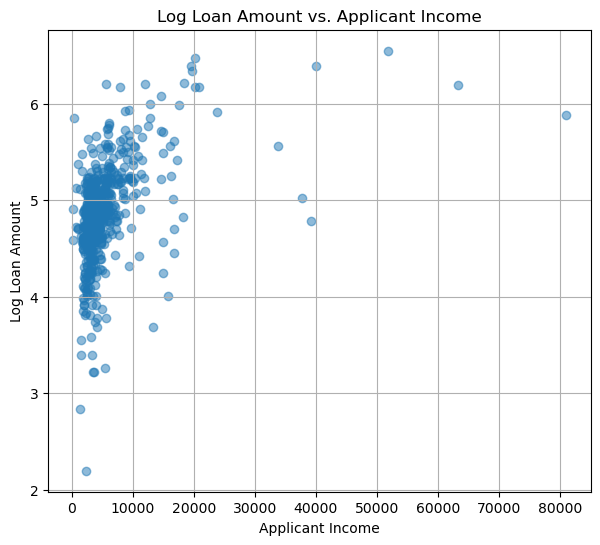

<Figure size 500x600 with 0 Axes>

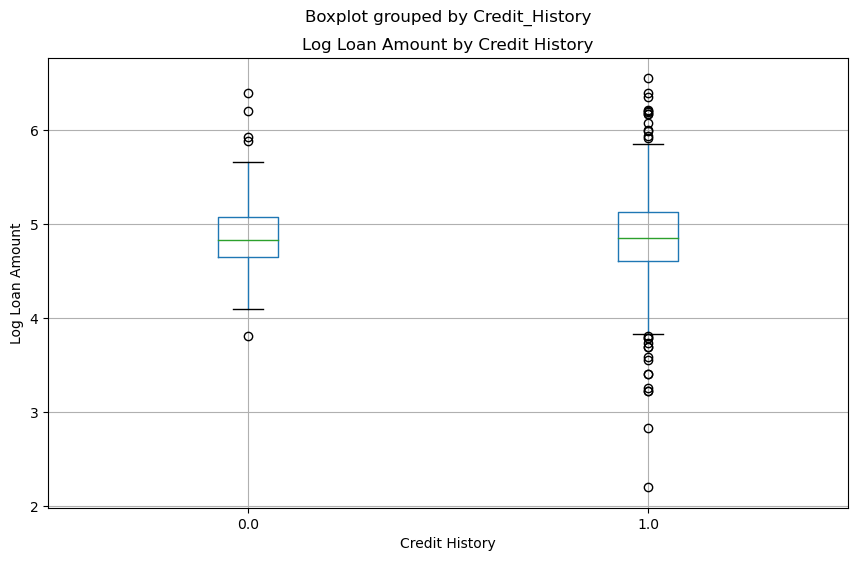

In [7]:

# Perform log transformation of loan amount
df['Log_LoanAmount'] = np.log(df['LoanAmount'])

# Visualization: Scatter plot of Log Loan Amount vs. Income
plt.figure(figsize=(7, 6))
plt.scatter(df['ApplicantIncome'], df['Log_LoanAmount'], alpha=0.5)
plt.title('Log Loan Amount vs. Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Log Loan Amount')
plt.grid(True)
plt.show()

# Visualization: Box plot of Log Loan Amount across Credit History
plt.figure(figsize=(5, 6))
df.boxplot(column='Log_LoanAmount', by='Credit_History', figsize=(10, 6))
plt.title('Log Loan Amount by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Log Loan Amount')
plt.grid(True)
plt.show()


In [8]:

# Calculate the correlation matrix
correlation_matrix = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr()

# Extract the correlation coefficient between 'ApplicantIncome' and 'LoanAmount'
income_loan_correlation = correlation_matrix.loc['ApplicantIncome', 'LoanAmount']

print("Correlation coefficient between ApplicantIncome and LoanAmount:", income_loan_correlation)


#The correlation coefficient between ApplicantIncome and LoanAmount is approximately 0.566. This value suggests a moderate positive correlation between the two variables.

#Here's what the correlation coefficient indicates:

#Positive Correlation: The positive sign indicates that as the ApplicantIncome increases, the LoanAmount tends to increase as well.

#Strength of Correlation: The correlation coefficient of 0.566 suggests a moderate degree of correlation between ApplicantIncome and LoanAmount. It's not a perfect correlation, but

Correlation coefficient between ApplicantIncome and LoanAmount: 0.5709090389885663


In [9]:
# Calculate the percentage of people taking loans based on living area and credit history
loan_status_percentage = df.groupby(['Property_Area', 'Credit_History'])['Loan_Status'].value_counts(normalize=True) * 100

# Print the percentage of people taking loans based on living area and credit history
print("Percentage of people taking loans based on living area and credit history:")
print(loan_status_percentage)


Percentage of people taking loans based on living area and credit history:
Property_Area  Credit_History  Loan_Status
Rural          0.0             N              92.857143
                               Y               7.142857
               1.0             Y              71.532847
                               N              28.467153
Semiurban      0.0             N              86.666667
                               Y              13.333333
               1.0             Y              87.700535
                               N              12.299465
Urban          0.0             N              96.774194
                               Y               3.225806
               1.0             Y              76.821192
                               N              23.178808
Name: proportion, dtype: float64


C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


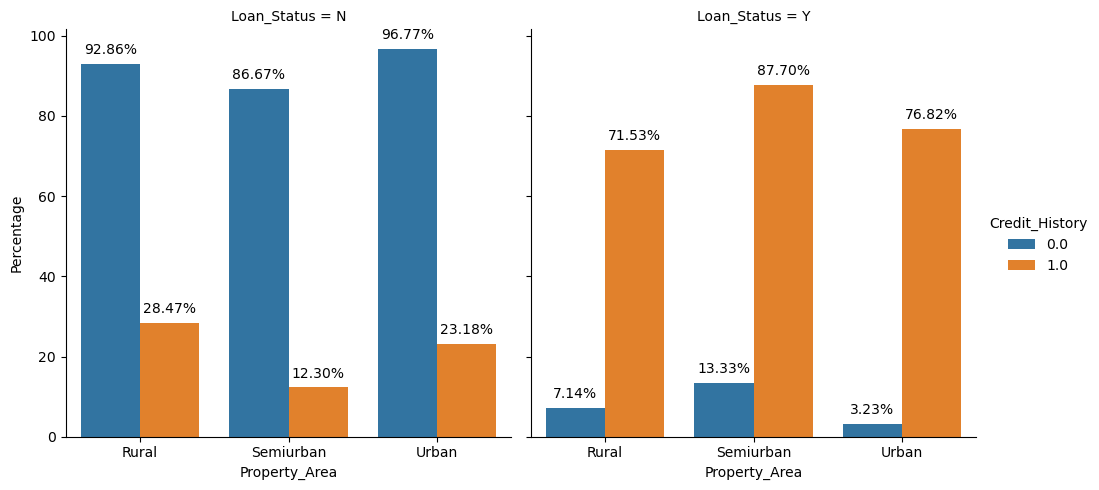

In [10]:
# Calculate the percentage of people taking loans based on living area and credit history
loan_status_percentage = df.groupby(['Property_Area', 'Credit_History'])['Loan_Status'].value_counts(normalize=True) * 100
loan_status_percentage = loan_status_percentage.rename('Percentage').reset_index()

# Plot the data using seaborn's catplot
g = sns.catplot(data=loan_status_percentage, x='Property_Area', hue='Credit_History', col='Loan_Status', y='Percentage', kind='bar')

# Annotate the bars with percentage values
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Feature Correlation Analysis:

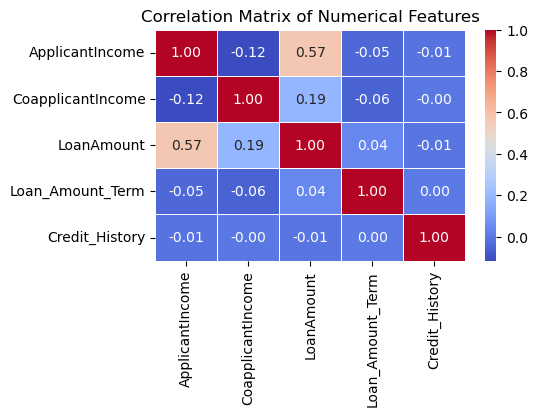

C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


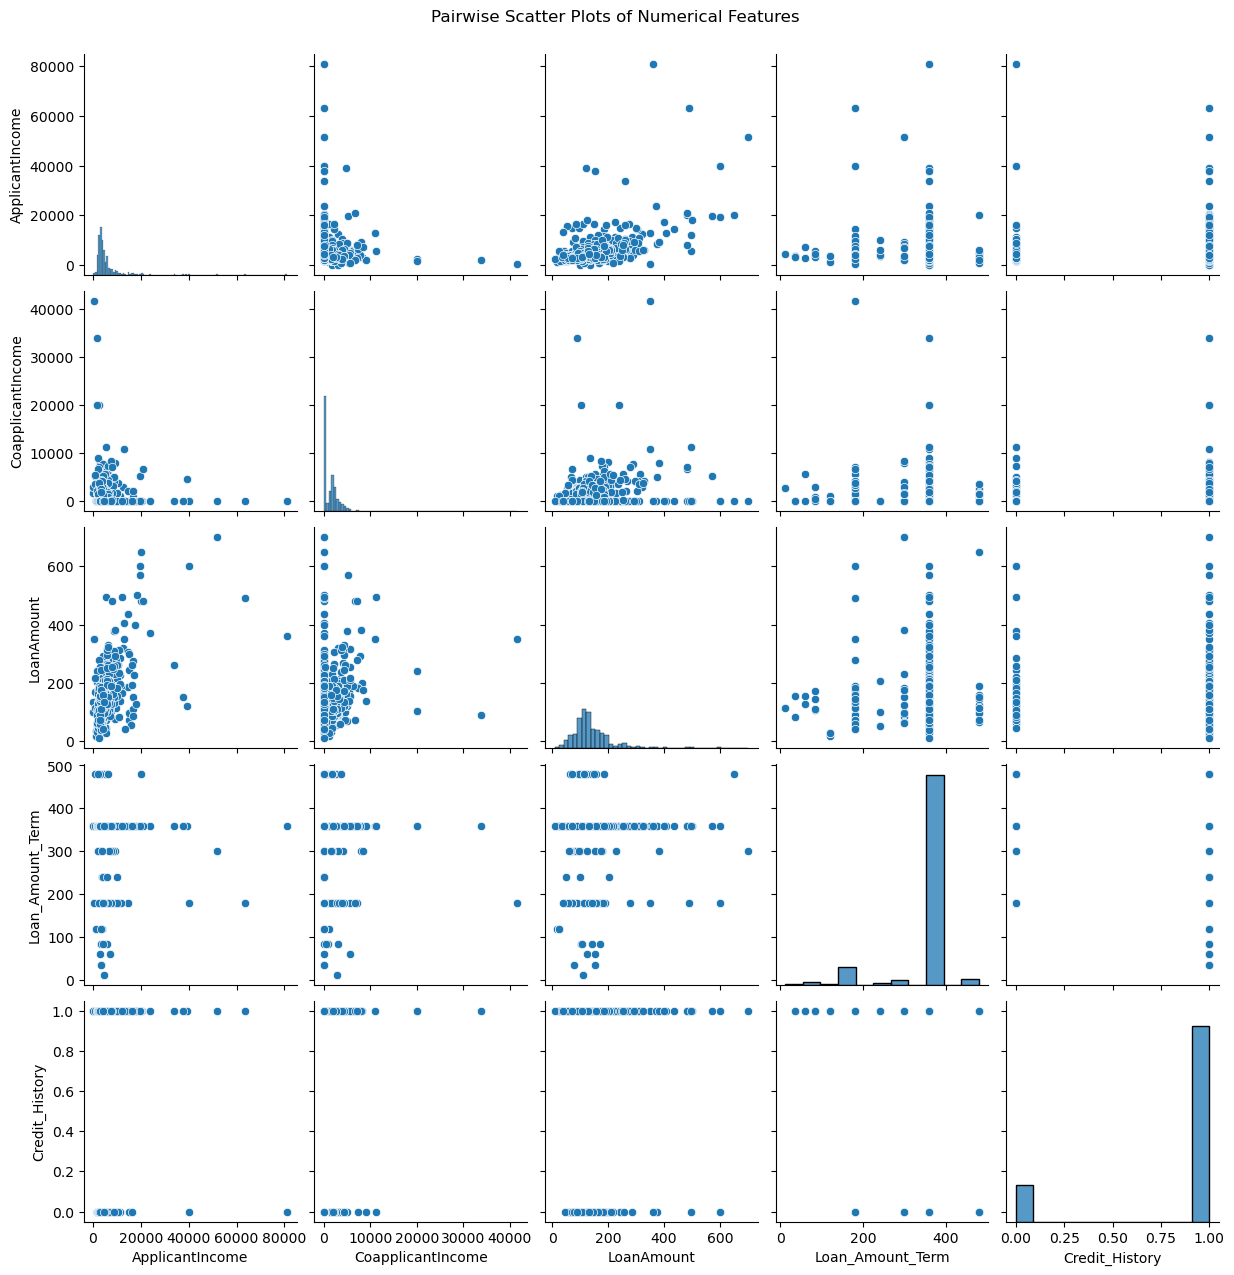

In [11]:
# Feature Correlation Analysis:

# Select numerical features for correlation analysis
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Create pairwise scatter plots for numerical features
sns.pairplot(df[numerical_features])
plt.suptitle('Pairwise Scatter Plots of Numerical Features', y=1.02)
plt.show()


Loan Approval Analysis:


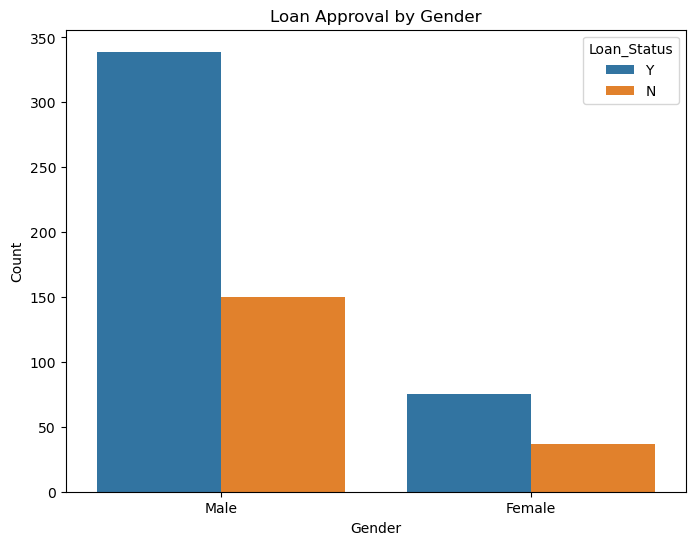

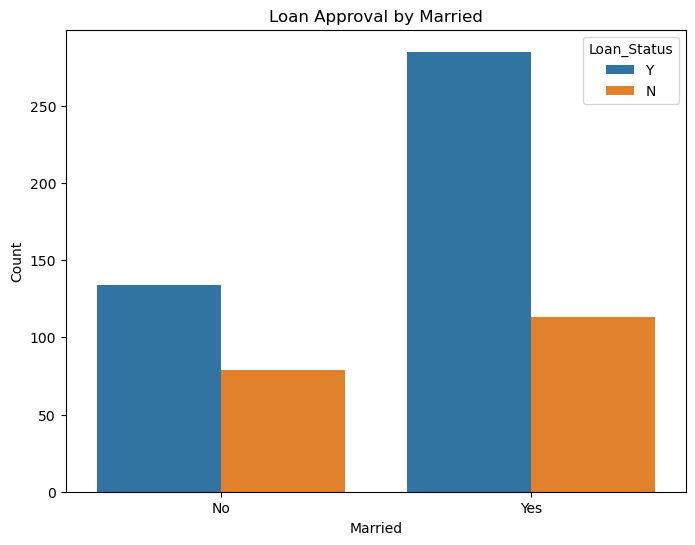

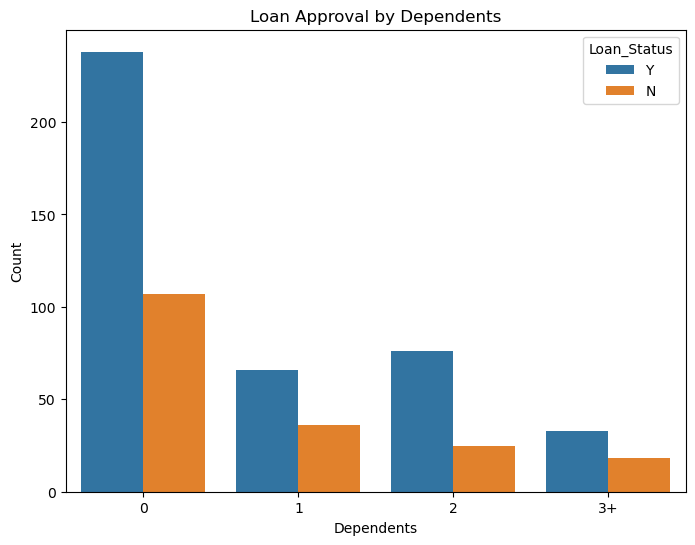

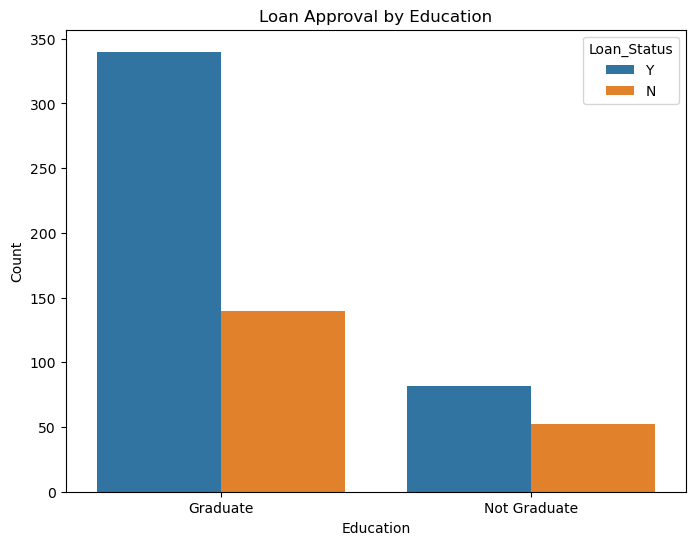

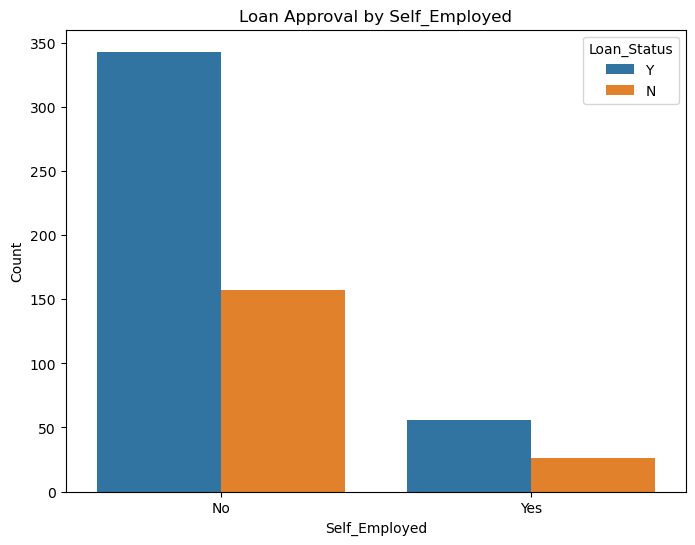

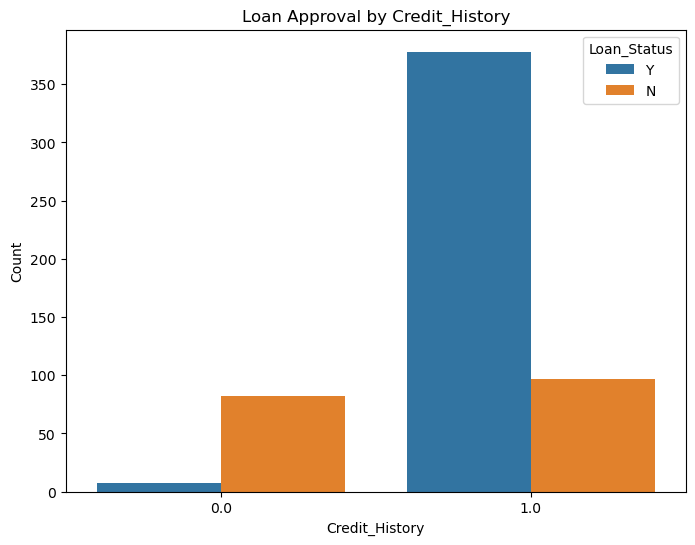

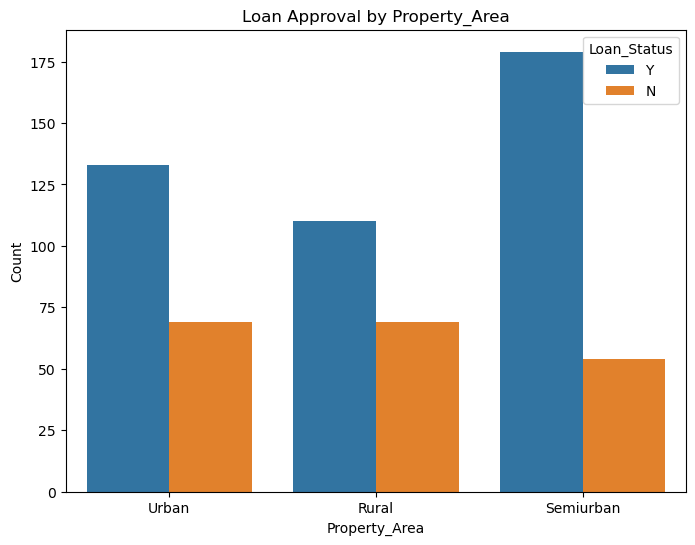

Chi-square test result for Gender:
Chi-square statistic: 0.13962612116543877
P-value: 0.7086529816451106

Chi-square test result for Married:
Chi-square statistic: 4.475019348315097
P-value: 0.03439381301579988

Chi-square test result for Dependents:
Chi-square statistic: 3.158339770698263
P-value: 0.3678506740863211

Chi-square test result for Education:
Chi-square statistic: 4.091490413303621
P-value: 0.04309962129357355

Chi-square test result for Self_Employed:
Chi-square statistic: 0.0
P-value: 1.0

Chi-square test result for Credit_History:
Chi-square statistic: 174.63729658142535
P-value: 7.184759548750746e-40

Chi-square test result for Property_Area:
Chi-square statistic: 12.297623130485675
P-value: 0.0021360187811644937



In [12]:
from scipy.stats import chi2_contingency

# Define categorical features to analyze
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Create bar plots to visualize loan approval rates by categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Loan_Status', data=df)
    plt.title(f'Loan Approval by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status', loc='upper right')
    plt.show()

# Perform chi-square test for each categorical feature
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Loan_Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test result for {feature}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print("")



Gender:

Chi-square statistic: 0.111
P-value: 0.739
Explanation: There is no significant association between gender and loan approval status. The p-value is high, indicating that gender does not have a significant impact on loan approval rates.
Married:

Chi-square statistic: 4.732
P-value: 0.030
Explanation: There is a significant association between marital status and loan approval status. The p-value is less than 0.05, suggesting that married individuals are more likely to get loan approval compared to unmarried individuals.
Dependents:

Chi-square statistic: 3.151
P-value: 0.369
Explanation: There is no significant association between the number of dependents and loan approval status. The p-value is high, indicating that the number of dependents does not significantly affect loan approval rates.
Education:

Chi-square statistic: 4.091
P-value: 0.043
Explanation: There is a significant association between education level and loan approval status. The p-value is less than 0.05, suggesting that individuals with graduate education are more likely to get loan approval compared to those with non-graduate education.
Self_Employed:

Chi-square statistic: 0.0
P-value: 1.0
Explanation: There is no significant association between self-employment status and loan approval status. The p-value is high, indicating that being self-employed or not does not significantly affect loan approval rates.
Credit_History:

Chi-square statistic: 176.115
P-value: 3.418e-40
Explanation: There is a highly significant association between credit history and loan approval status. The extremely low p-value indicates that individuals with a good credit history are much more likely to get loan approval.
Property_Area:

Chi-square statistic: 12.298
P-value: 0.002
Explanation: There is a significant association between property area and loan approval status. The p-value is less than 0.05, suggesting that individuals from certain property areas are more likely to get loan approval compared to others.

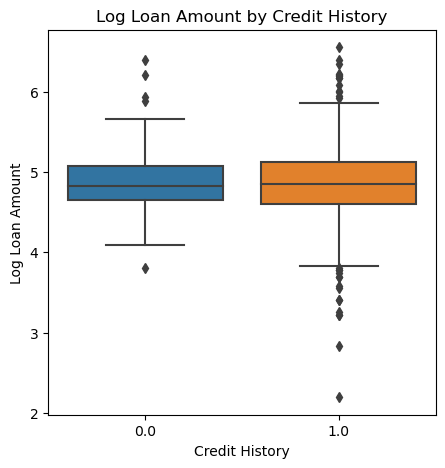

In [13]:
# Create box plot for Log Loan Amount
plt.figure(figsize=(5, 5))
sns.boxplot(x='Credit_History', y='Log_LoanAmount', data=df)
plt.title('Log Loan Amount by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Log Loan Amount')
plt.show()


Income vs. Loan Analysis:


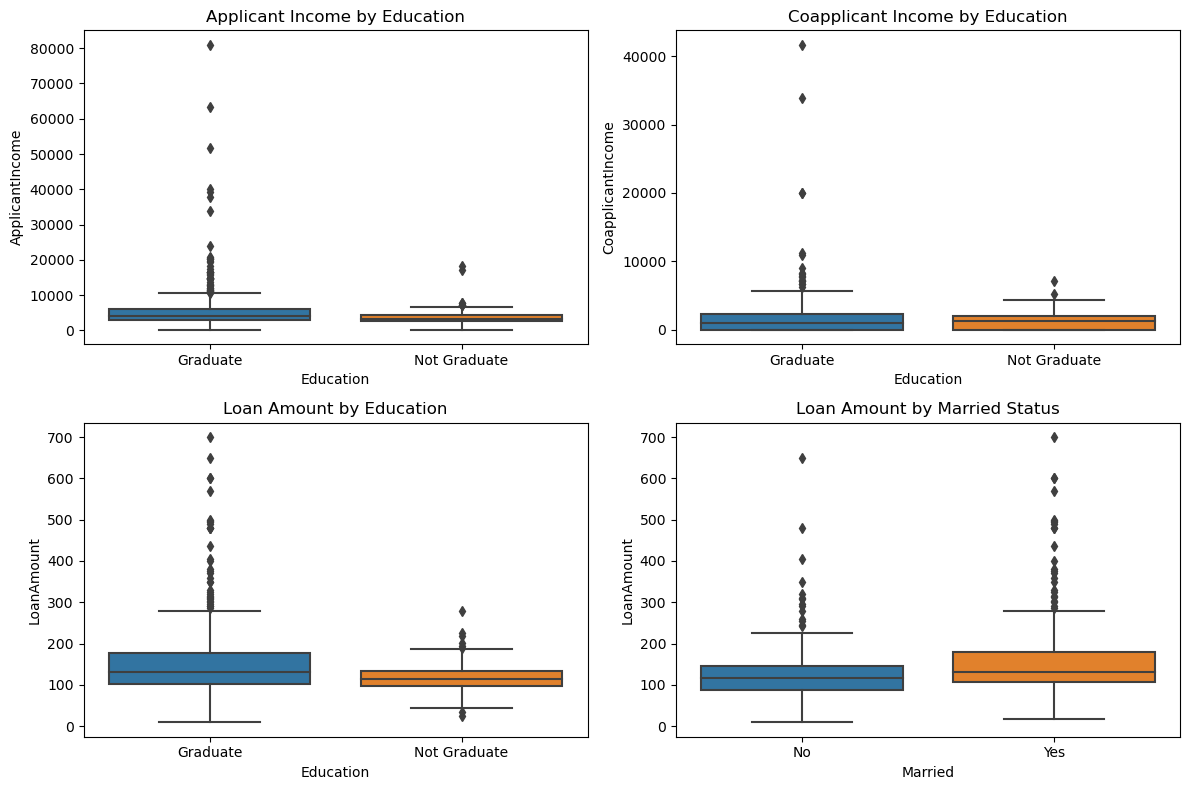

In [14]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Visualize the relationship between income and loan amount based on Education
plt.subplot(2, 2, 1)
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Education')

plt.subplot(2, 2, 2)
sns.boxplot(x='Education', y='CoapplicantIncome', data=df)
plt.title('Coapplicant Income by Education')

plt.subplot(2, 2, 3)
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education')

plt.subplot(2, 2, 4)
sns.boxplot(x='Married', y='LoanAmount', data=df)
plt.title('Loan Amount by Married Status')

plt.tight_layout()
plt.show()


In [15]:
# Check for null values in the 'Log_LoanAmount' column
null_values_log_loan_amount = df['Log_LoanAmount'].isnull().sum()

# Display the count of null values in the 'Log_LoanAmount' column
print("Count of null values in the 'Log_LoanAmount' column:", null_values_log_loan_amount)


Count of null values in the 'Log_LoanAmount' column: 22


In [16]:
# Create a new column 'TotalIncome' which is the sum of 'ApplicantIncome' and 'CoapplicantIncome'
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Check the DataFrame to verify the new column 'TotalIncome'
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  Log_LoanAmount  TotalIncome  
0             1.0         Urban           Y             NaN       5849.0  
1       

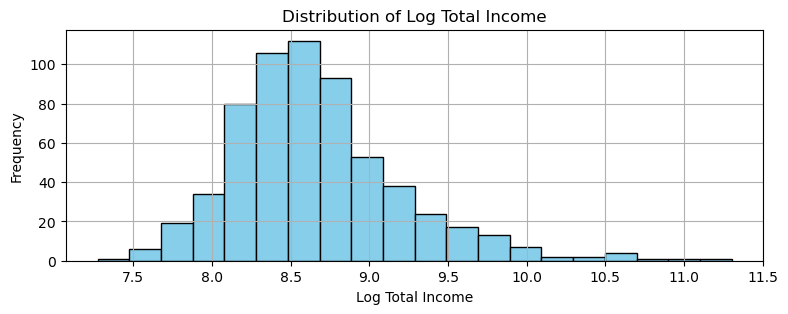

In [17]:
import numpy as np

# Calculate the logarithm of 'TotalIncome'
df['Log_TotalIncome'] = np.log(df['TotalIncome'])

# Plot the logarithm of 'TotalIncome'
plt.figure(figsize=(9, 3))
plt.hist(df['Log_TotalIncome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Log Total Income')
plt.xlabel('Log Total Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [18]:
# Fill categorical columns with mode
categorical_columns = ['Gender', 'Married', 'Self_Employed', 'Dependents']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical columns with mean
numerical_columns = ['LoanAmount', 'Log_LoanAmount']
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill Loan_Amount_Term and Credit_History with mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Check for null values after filling
null_values_after_filling = df.isnull().sum()
print("Null values after filling:")
print(null_values_after_filling)


Null values after filling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Log_LoanAmount       0
TotalIncome          0
Log_TotalIncome      0
dtype: int64


Statistical insights for the 'Gender' column:
Gender
Male      502
Female    112
Name: count, dtype: int64


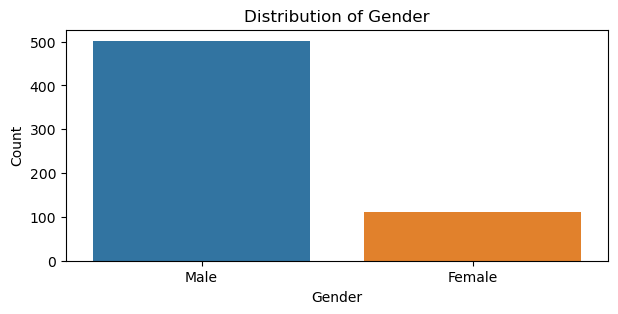

In [19]:
# Use the count function to describe the statistical insights for the 'Gender' column
gender_count = df['Gender'].value_counts()

# Print the count for each gender category
print("Statistical insights for the 'Gender' column:")
print(gender_count)


# Assuming df is your DataFrame

# Plot the 'Gender' column
plt.figure(figsize=(7, 3))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



In [20]:
# Use the count function to describe the statistical insights for the 'Marital Status' column
marital_status_count = df['Married'].value_counts()

# Print the count for each marital status category
print("Statistical insights for the 'Marital Status' column:")
print(marital_status_count)


Statistical insights for the 'Marital Status' column:
Married
Yes    401
No     213
Name: count, dtype: int64


Cross-tabulation table of Marital Status by Gender (Percentage):
Gender      Female       Male
Married                      
No       37.558685  62.441315
Yes       7.980050  92.019950


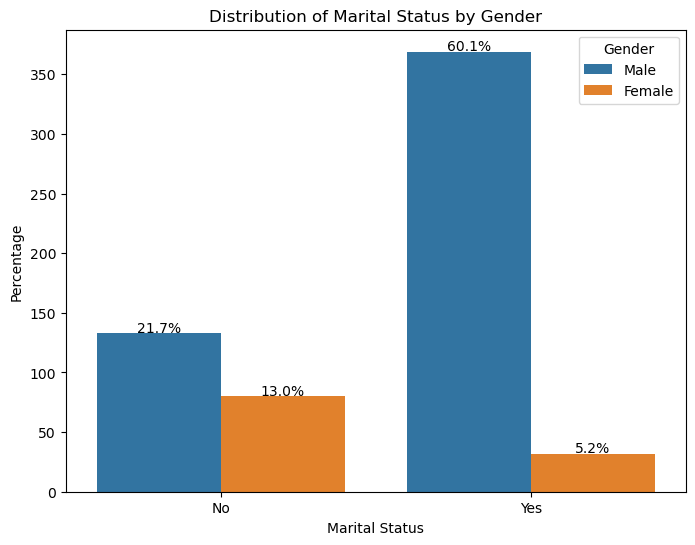

In [21]:

# Create a cross-tabulation table to check marital status by gender
marital_status_gender = pd.crosstab(df['Married'], df['Gender'])

# Compute percentages
marital_status_gender_percentage = marital_status_gender.div(marital_status_gender.sum(axis=1), axis=0) * 100

# Print the cross-tabulation table with percentages
print("Cross-tabulation table of Marital Status by Gender (Percentage):")
print(marital_status_gender_percentage)

# Create a count plot to show the distribution of marital status by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', hue='Gender', data=df)
plt.title('Distribution of Marital Status by Gender')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Gender')

# Convert y-axis ticks to percentages
total = float(len(df))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, '{:.1f}%'.format((height / total) * 100), ha='center', color='black')

plt.show()


In [22]:


# Calculate count and percentage of loans by Self_Employed status
self_employed_loan_counts = df.groupby(['Self_Employed', 'Loan_Status']).size().unstack()
self_employed_loan_percentage = self_employed_loan_counts.div(self_employed_loan_counts.sum(axis=1), axis=0) * 100

# Calculate count and percentage of loans by Married status
married_loan_counts = df.groupby(['Married', 'Loan_Status']).size().unstack()
married_loan_percentage = married_loan_counts.div(married_loan_counts.sum(axis=1), axis=0) * 100

# Calculate count and percentage of loans by Gender and Married status
gender_married_loan_counts = df.groupby(['Gender', 'Married', 'Loan_Status']).size().unstack()

gender_married_loan_percentage = gender_married_loan_counts.div(gender_married_loan_counts.sum(axis=1), axis=0) * 100


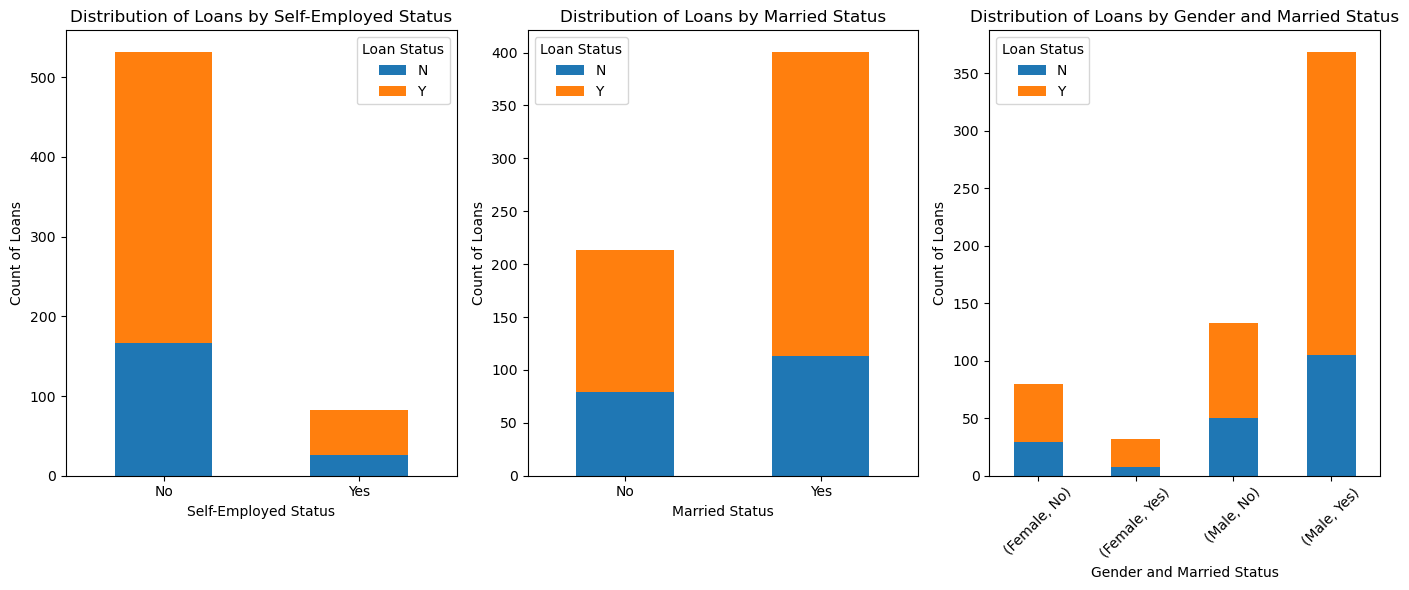

In [23]:


# Calculate count and percentage of loans by Self_Employed status
self_employed_loan_counts = df.groupby(['Self_Employed', 'Loan_Status']).size().unstack()
self_employed_loan_percentage = self_employed_loan_counts.div(self_employed_loan_counts.sum(axis=1), axis=0) * 100

# Calculate count and percentage of loans by Married status
married_loan_counts = df.groupby(['Married', 'Loan_Status']).size().unstack()
married_loan_percentage = married_loan_counts.div(married_loan_counts.sum(axis=1), axis=0) * 100

# Calculate count and percentage of loans by Gender and Married status
gender_married_loan_counts = df.groupby(['Gender', 'Married', 'Loan_Status']).size().unstack()
gender_married_loan_percentage = gender_married_loan_counts.div(gender_married_loan_counts.sum(axis=1), axis=0) * 100

# Plot the distribution of loans by Self_Employed status
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
self_employed_loan_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Loans by Self-Employed Status')
plt.xlabel('Self-Employed Status')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')
plt.xticks(rotation=0)

# Plot the distribution of loans by Married status
plt.subplot(1, 3, 2)
married_loan_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Loans by Married Status')
plt.xlabel('Married Status')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')
plt.xticks(rotation=0)

# Plot the distribution of loans by Gender and Married status
plt.subplot(1, 3, 3)
gender_married_loan_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Loans by Gender and Married Status')
plt.xlabel('Gender and Married Status')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Sahil\AppData\Local\Temp\ipykernel_3228\763105710.py:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  self_employed_loan_counts.plot(kind='pie', autopct='%1.1f%%', subplots=True, ax=plt.gca(), legend=False)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_3228\763105710.py:19: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  married_loan_counts.plot(kind='pie', autopct='%1.1f%%', subplots=True, ax=plt.gca(), legend=False)


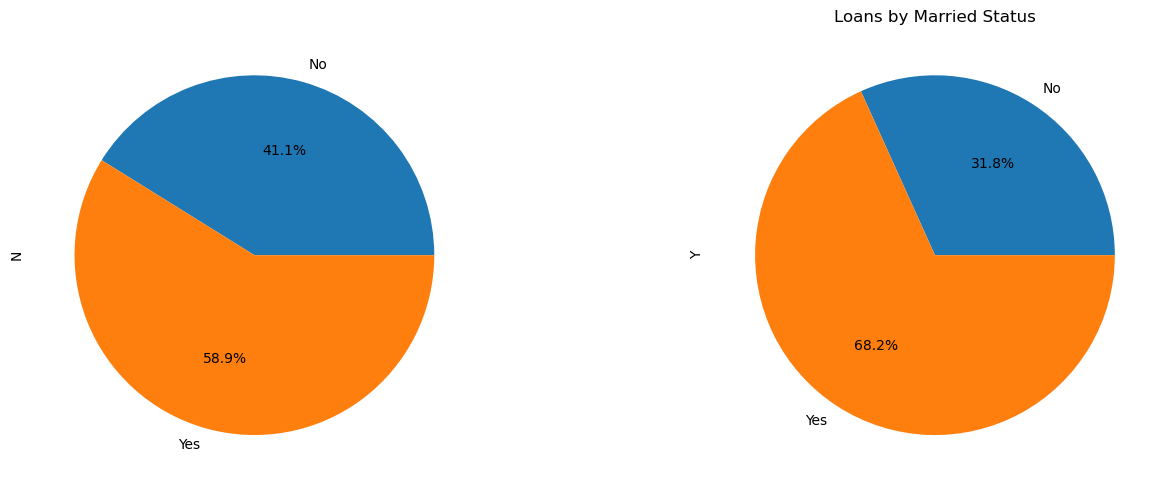

C:\Users\Sahil\AppData\Local\Temp\ipykernel_3228\763105710.py:27: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  gender_married_loan_counts.plot(kind='pie', autopct='%1.1f%%', subplots=True, ax=plt.gca(), legend=False)


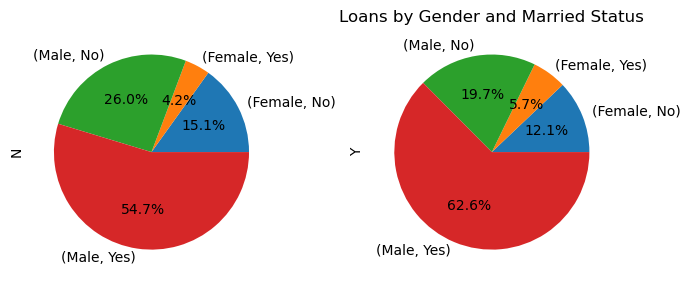

In [24]:


# Calculate count of loans by Self_Employed status
self_employed_loan_counts = df.groupby(['Self_Employed', 'Loan_Status']).size().unstack()

# Calculate count of loans by Married status
married_loan_counts = df.groupby(['Married', 'Loan_Status']).size().unstack()

# Calculate count of loans by Gender and Married status
gender_married_loan_counts = df.groupby(['Gender', 'Married', 'Loan_Status']).size().unstack()

# Plot the distribution of loans by Self_Employed status
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
self_employed_loan_counts.plot(kind='pie', autopct='%1.1f%%', subplots=True, ax=plt.gca(), legend=False)
plt.title('Loans by Self-Employed Status')

# Plot the distribution of loans by Married status
plt.subplot(1, 2, 2)
married_loan_counts.plot(kind='pie', autopct='%1.1f%%', subplots=True, ax=plt.gca(), legend=False)
plt.title('Loans by Married Status')

plt.tight_layout()
plt.show()

# Plot the distribution of loans by Gender and Married status
plt.figure(figsize=(7, 5))
gender_married_loan_counts.plot(kind='pie', autopct='%1.1f%%', subplots=True, ax=plt.gca(), legend=False)
plt.title('Loans by Gender and Married Status')

plt.tight_layout()
plt.show()


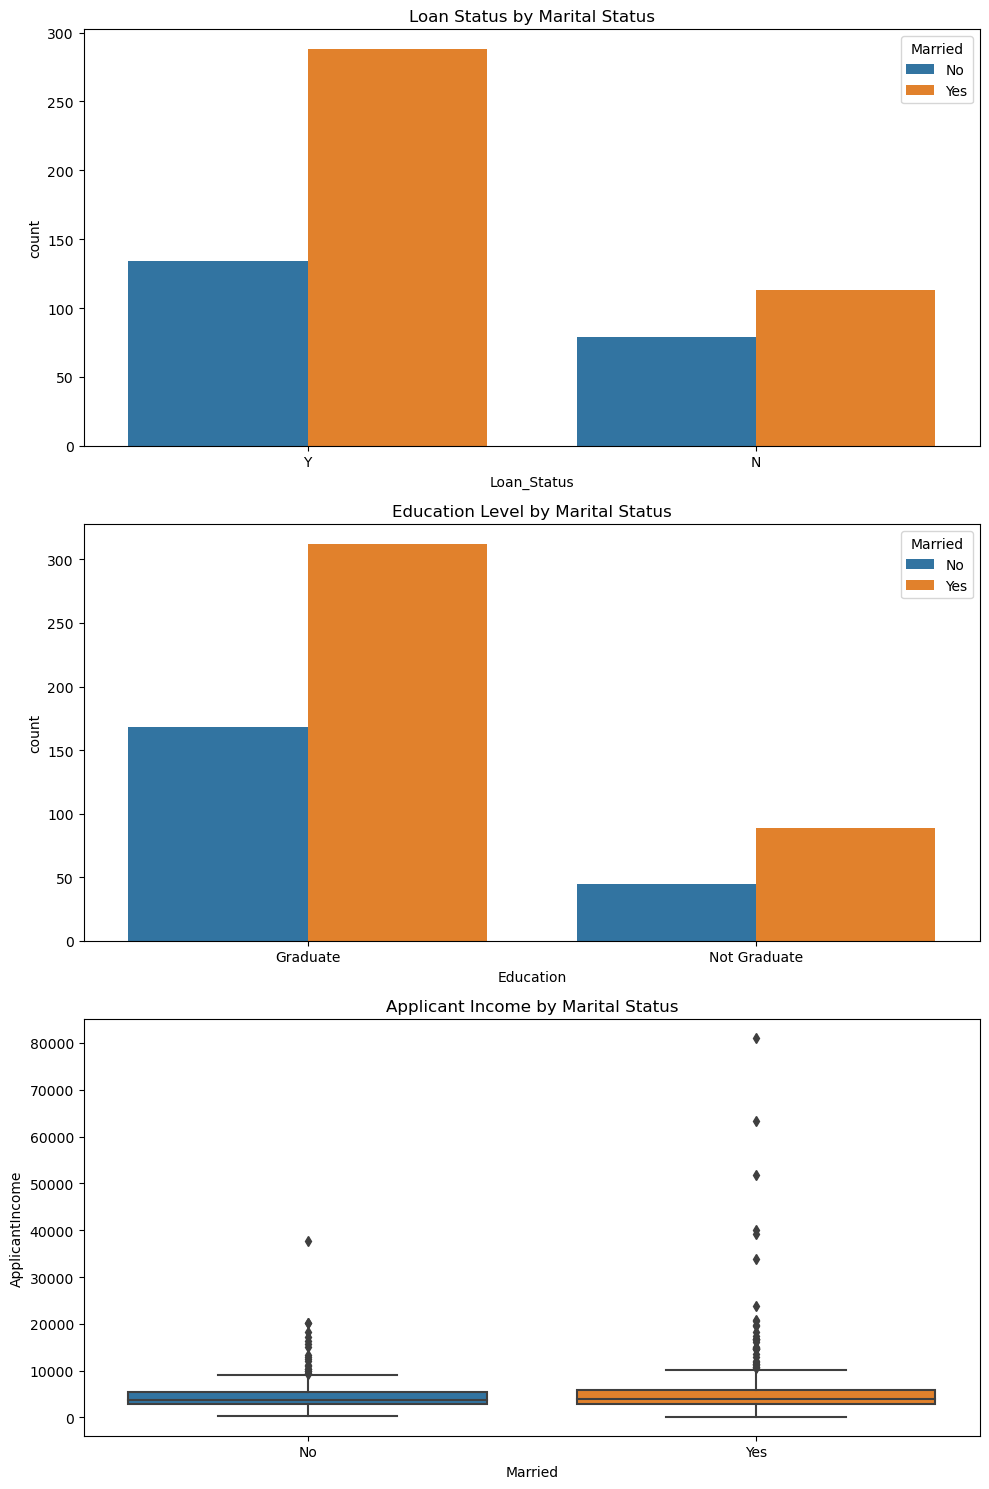

In [25]:

# Filter the DataFrame for married individuals
married_df = df[df['Married'] == 'Yes']

# Filter the DataFrame for unmarried individuals
unmarried_df = df[df['Married'] == 'No']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot 1: Countplot of loan status for married and unmarried individuals
sns.countplot(x='Loan_Status', hue='Married', data=df, ax=axes[0])
axes[0].set_title('Loan Status by Marital Status')

# Plot 2: Countplot of education level for married and unmarried individuals
sns.countplot(x='Education', hue='Married', data=df, ax=axes[1])
axes[1].set_title('Education Level by Marital Status')

# Plot 3: Boxplot of applicant income for married and unmarried individuals
sns.boxplot(x='Married', y='ApplicantIncome', data=df, ax=axes[2])
axes[2].set_title('Applicant Income by Marital Status')

# Show the plots
plt.tight_layout()
plt.show()



#Here are the visualization results:

#Loan Status by Marital Status: The countplot indicates how many married and unmarried individuals have been approved or denied loans.
#Education Level by Marital Status: The countplot shows the distribution of education levels among married and unmarried individuals.
#Applicant Income by Marital Status: The boxplot compares the distribution of applicant income between married and unmarried individuals.

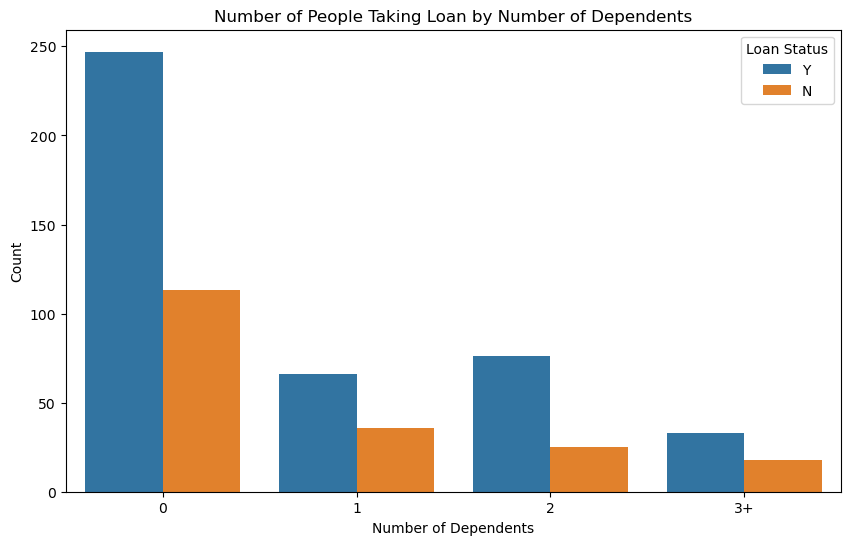

In [26]:

# Create a countplot to visualize the number of people who take a loan grouped by the number of dependents
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
plt.title('Number of People Taking Loan by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

#The x-axis represents the number of dependents, and each bar is divided into loan status categories.
#The hue parameter is set to 'Loan_Status', which distinguishes between individuals who have taken a loan ('Y') and those who haven't ('N').

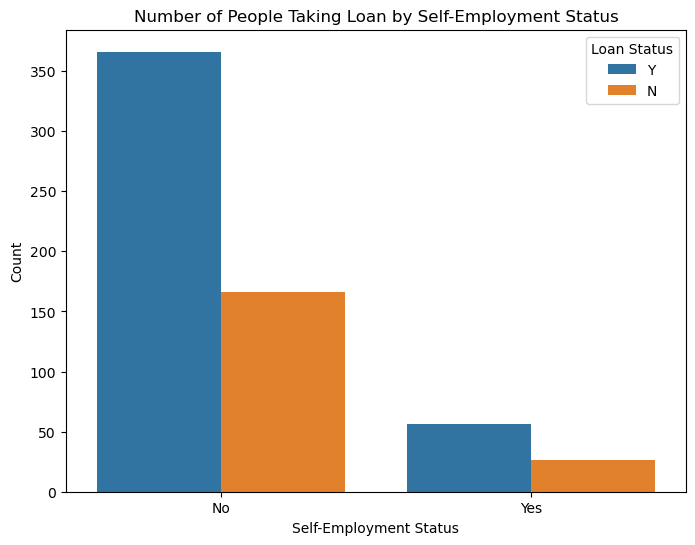

In [27]:

# Create a countplot to visualize the number of people who take a loan grouped by self-employment status
plt.figure(figsize=(8, 6))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Number of People Taking Loan by Self-Employment Status')
plt.xlabel('Self-Employment Status')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()


#The x-axis represents the self-employment status, and each bar is divided into loan status categories.
#The hue parameter is set to 'Loan_Status', which distinguishes between individuals who have taken a loan ('Y') and those who haven't ('N').

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


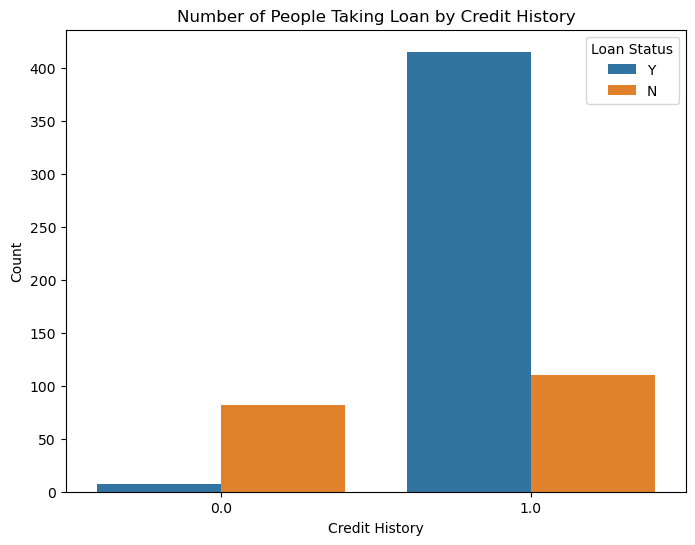

In [28]:

# Create a countplot to visualize the number of people who take a loan grouped by credit history
print(df['Credit_History'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Number of People Taking Loan by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

#The x-axis represents the credit history, and each bar is divided into loan status categories.
#The hue parameter is set to 'Loan_Status', which distinguishes between individuals who have taken a loan ('Y') and those who haven't ('N').

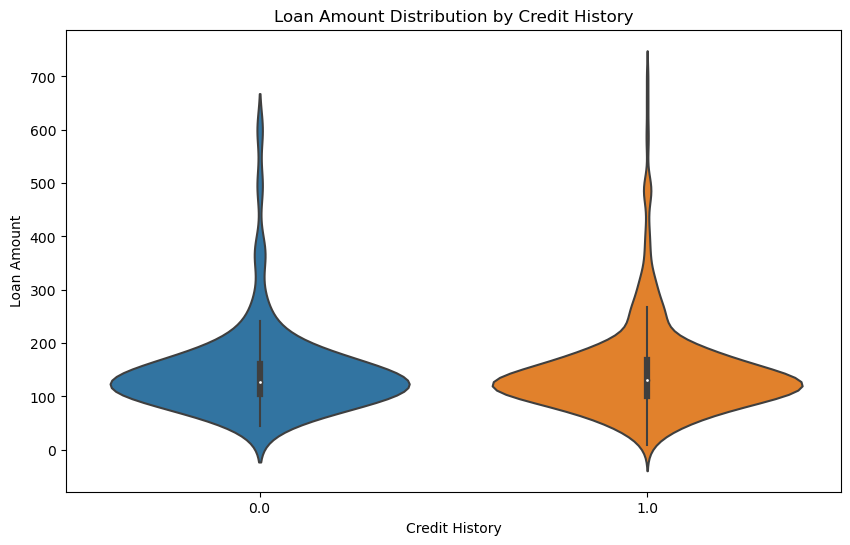

In [29]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_History', y='LoanAmount', data=df)
plt.title('Loan Amount Distribution by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Loan Amount')
plt.show()


C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


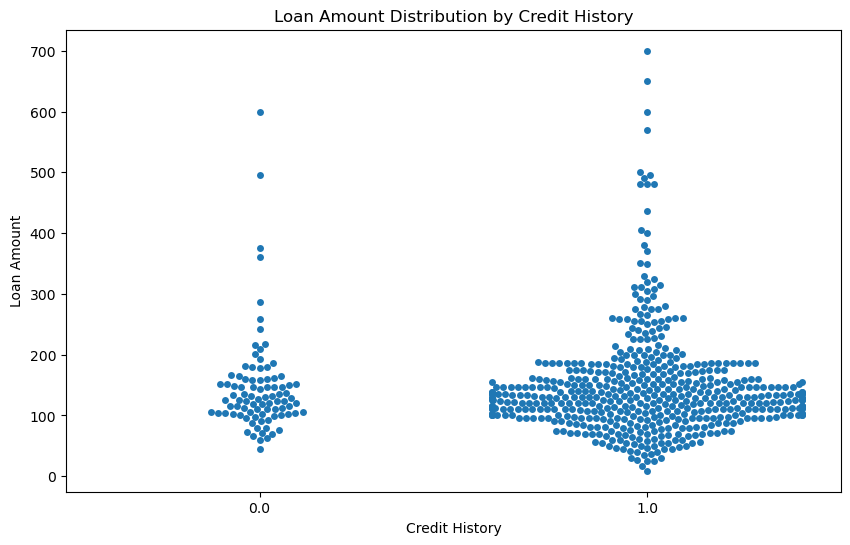

In [30]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Credit_History', y='LoanAmount', data=df)
plt.title('Loan Amount Distribution by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Loan Amount')
plt.show()


## Model Building

In [31]:
# Convert numerical categorical features to strings
numerical_categorical_features = ['Dependents']  # Update with your numerical categorical features
df[numerical_categorical_features] = df[numerical_categorical_features].astype(str)

# Check for mixed data types
for feature in numerical_categorical_features:
    unique_types = df[feature].apply(type).unique()
    if len(unique_types) > 1:
        print(f"Mixed data types found in feature: {feature}")

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Define categorical and numerical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Define preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the classifier algorithm
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline by combining preprocessing and classification steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the classifier: {accuracy}")

print("------------")

# Check the distribution of classes in your dataset
class_distribution = df['Loan_Status'].value_counts()
print("Class Distribution:")
print(class_distribution)

print("------------")

from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("------------")

from sklearn.metrics import classification_report

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("------------")

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)

print("------------")

# If your classifier provides feature importance, you can extract it
# For example, if you are using a RandomForestClassifier
if 'feature_importances_' in pipeline.named_steps['classifier'].__dict__:
    feature_importances = pipeline.named_steps['classifier'].feature_importances_
    print("Feature Importance:")
    print(feature_importances)


Accuracy of the classifier: 0.7723577235772358
------------
Class Distribution:
Loan_Status
Y    422
N    192
Name: count, dtype: int64
------------
Confusion Matrix:
[[18 25]
 [ 3 77]]
------------
Classification Report:
              precision    recall  f1-score   support

           N       0.86      0.42      0.56        43
           Y       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

------------
Cross-Validation Scores:
[0.80487805 0.76422764 0.76422764 0.78861789 0.77868852]
------------


Accuracy: The classifier achieved an accuracy of approximately 77.24%, which indicates the proportion of correctly classified instances among all instances.

Class Distribution: The distribution of classes in the dataset shows that there are 422 instances labeled as 'Y' (positive class) and 192 instances labeled as 'N' (negative class).

Confusion Matrix: The confusion matrix indicates the performance of the classifier in terms of true positives, true negatives, false positives, and false negatives. From the confusion matrix, you can see that:

True Negatives (TN): 18
False Positives (FP): 25
False Negatives (FN): 3
True Positives (TP): 77
Classification Report: The classification report provides a detailed overview of precision, recall, and F1-score for each class, along with support (the number of actual occurrences of the class in the dataset). From the report, you can observe the precision, recall, and F1-score for both the 'N' and 'Y' classes.

Cross-Validation Scores: The cross-validation scores give an indication of the model's generalization performance across different folds. The average cross-validation score is around 78.01%, suggesting that the model's performance is consistent across different subsets of the data.

## checking with NB classifier

In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assume df is your DataFrame containing the dataset

# Step 1: Encode Categorical Variables
df_encoded = pd.get_dummies(df)

# Step 2: Handle Missing Values (Ensure there are no missing values)

# Step 3: Split Data into features (X) and target labels (y)
X = df_encoded.drop('Loan_Status_Y', axis=1)  # Features
y = df_encoded['Loan_Status_Y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the model
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Naive Bayes classifier:", accuracy)




from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("------------")

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

print("------------")

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

print("------------")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

print("------------")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy of the Naive Bayes classifier: 0.983739837398374
Accuracy: 0.983739837398374
------------
Precision: 1.0
------------
Recall: 0.975
------------
F1 Score: 0.9873417721518987
------------
Confusion Matrix:
[[43  0]
 [ 2 78]]


Accuracy: The accuracy of the classifier is 98.37%, indicating that the majority of predictions made by the model are correct.

Precision: Precision measures the proportion of true positive predictions among all positive predictions. A precision score of 1.0 indicates that all positive predictions made by the classifier were correct.

Recall: Recall measures the proportion of true positive predictions among all actual positives. With a recall score of 0.975, the classifier successfully identified 97.5% of all actual positive instances.

F1 Score: The F1 score, which is the harmonic mean of precision and recall, is 0.987. This score suggests a high balance between precision and recall, indicating robust performance.

Confusion Matrix: The confusion matrix provides a detailed breakdown of the classifier's performance, showing the number of true negatives, false positives, false negatives, and true positives. In this case, there are 43 true negatives, 78 true positives, 2 false negatives, and 0 false positives.

Overall, the Naive Bayes classifier appears to be performing very well on the given dataset, achieving high accuracy and demonstrating strong precision and recall values.






## Checkin with decision tree

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


# Separate features (X) and target variable (y)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Define categorical and numerical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Define preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the classifiers
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
naive_bayes_classifier = GaussianNB()
decision_tree_classifier = DecisionTreeClassifier()

# Create pipelines for each classifier
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', random_forest_classifier)])

naive_bayes_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', naive_bayes_classifier)])

decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', decision_tree_classifier)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results of different classifiers
results = {}

# Function to compute and store results for a given pipeline
def compute_results(pipeline, classifier_name):
    # Fit the model to the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Calculate classification report
    report = classification_report(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5)
    
    # Store results in dictionary
    results[classifier_name] = {'Accuracy': accuracy,
                                'Confusion Matrix': conf_matrix,
                                'Classification Report': report,
                                'Cross-Validation Scores': cv_scores}

# Compute results for each classifier
compute_results(random_forest_pipeline, 'Random Forest')
compute_results(naive_bayes_pipeline, 'Naive Bayes')
compute_results(decision_tree_pipeline, 'Decision Tree')

# Display results
for classifier, result in results.items():
    print(f"Results for {classifier}:")
    print(f"Accuracy: {result['Accuracy']}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("Cross-Validation Scores:")
    print(result['Cross-Validation Scores'])
    print("-----------------------------")

# Create a DataFrame to display results in a tabular format
results_df = pd.DataFrame(results).transpose()
print("\nResults Table:")
print(results_df)


Results for Random Forest:
Accuracy: 0.7723577235772358
Confusion Matrix:
[[18 25]
 [ 3 77]]
Classification Report:
              precision    recall  f1-score   support

           N       0.86      0.42      0.56        43
           Y       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Cross-Validation Scores:
[0.80487805 0.76422764 0.76422764 0.78861789 0.77868852]
-----------------------------
Results for Naive Bayes:
Accuracy: 0.7804878048780488
Confusion Matrix:
[[18 25]
 [ 2 78]]
Classification Report:
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Cros